# ***Exploratory Data Analisys - Análisis sobre los hábitos de vida del ciudadano***
## ➡️ **Visualizaciones y relaciones Eentre variables**
------

### 🗒️**Bloque de contenidos:**

1. [Importación de módulos](#1-importación-de-módulos)
2. [Carga del dataset limpio](#2-carga-del-dataset-limpio)

### **1. Importación de módulos**

In [1]:
# Ajusto la ruta
%cd ..

c:\Users\sorim\Documents\Data_Science\Evolve\repos\projects-evolve\EDA


In [2]:
from scripts.individual_visualization import distribucion_sueño
from scripts.relationship_visualization import boxplot_cat_num, plot_cartegoricas
from scripts.variables import orden_categorias
import pandas as pd


### **2. Carga del dataset limpio**

In [3]:
df = pd.read_csv('./data/data_clean.csv', low_memory = False) # Me salía un warning y me recomendó poner este argumento a False.
df.head()

,ejercicio,asma,cancer,grupo_edad,ingresos,educacion,empleo,estado,IMC,sueño_h,fumar,alcohol,salud_mental_malos,salud_general,salud_fisica_mala,diabetes,enf_cardio,sueño_cat
0,No,No,No,Age 80 or older,Refused,Graduated from College or Technical School,Retired,Alabama,NULO,8.0,No,No drinks in past 30 days,NaN,Very good,NaN,Yes,No,Más de 7h
1,No,No,Yes,Age 80 or older,"$25,000 to < $35,000",Graduated High School,Self-employed,Alabama,Overweight,6.0,No,No drinks in past 30 days,NaN,Excellent,NaN,No,No,Entre 4 y 7h
2,Yes,No,No,Age 55 to 59,"$150,000 to < $200,000",Graduated from College or Technical School,Retired,Alabama,Overweight,5.0,No,No drinks in past 30 days,3.0,Very good,2.0,No,No,Entre 4 y 7h
3,Yes,Yes,No,NULO,Don’t know/Not sure,Graduated High School,Retired,Alabama,Normal Weight,7.0,Yes,No drinks in past 30 days,NaN,Excellent,NaN,No,No,Entre 4 y 7h
4,Yes,No,No,Age 40 to 44,"$25,000 to < $35,000",Attended College or Technical School,A homemaker,Alabama,Normal Weight,9.0,No,2 days per week,NaN,Fair,2.0,No,No,Más de 7h


### **3. Distribución final de las variables**

Una vez hecha todas las transformaciones pertinentes, visualizamos únicamente aquella que hemos transformado y no hemos visto su distribución siendo de tipo categórica.

In [4]:
num_cols = ['salud_mental_malos', 'salud_fisica_mala']
cat_cols = [col for col in df.columns if col not in num_cols and col != 'sueño_h']

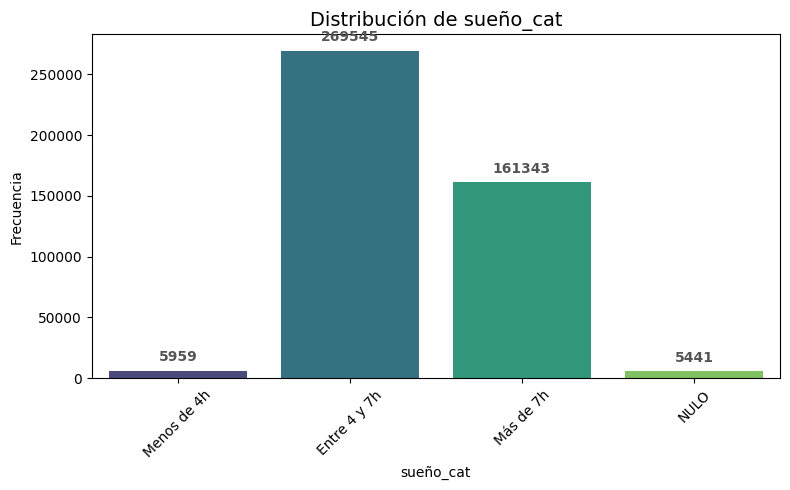

In [5]:
distribucion_sueño(df, 'sueño_cat')


Al categorizar esta variable, el ruido que puede generar los outliers es menor.

Se puede observar que los valores se concentran en la etiquea de entre 4 y 7h y en el de más de 7h

### **4. Relaciones clave entre variables** 

En este apartado se analizarán las **relaciones más relevantes** entre las variables del dataset, siempre desde un enfoque exploratorio. Aunque este análisis no pretende establecer causalidad, sí permite identificar patrones, tendencias y posibles asociaciones que pueden ser útiles para futuros modelos o hipótesis.

El **objetivo** es responder a preguntas como:

- ¿Cómo se relacionan los hábitos con la salud percibida?

- ¿Existen combinaciones de factores que parezcan afectar al bienestar general?

- ¿Qué variables muestran patrones consistentes entre sí?

- ¿Hay diferencias entre grupos específicos?

A continuación se describen las principales relaciones que se explorarán:


#### ***4.1. Relación entre actividad física y salud mental***

La actividad física es uno de los factores más estudiados dentro del bienestar psicológico.

**Aspectos que se investigarán**:

- ¿Reportan mejor salud mental las personas que realizan actividad física de manera regular?

- ¿Qué ocurre con las personas que declaran no realizar ejercicio?

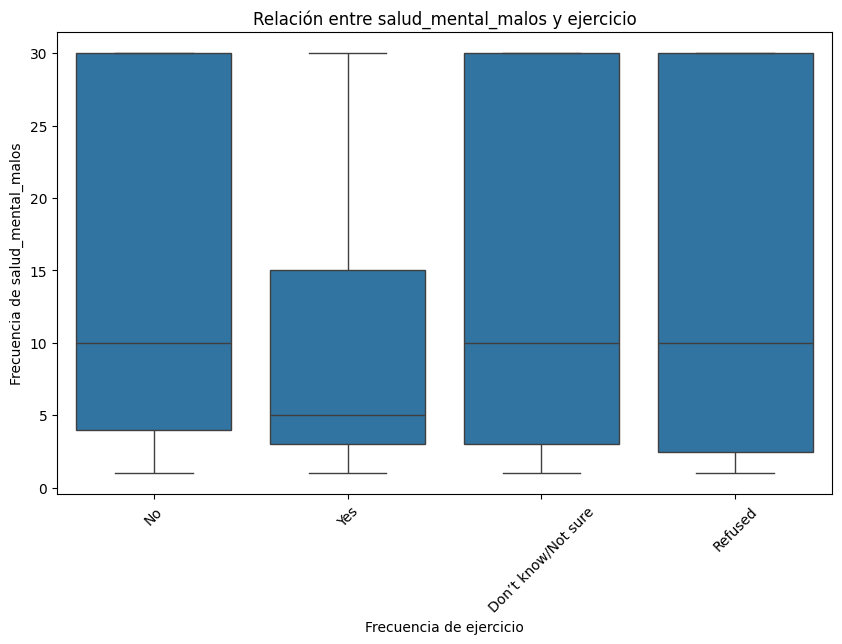

In [6]:
boxplot_cat_num(df, 'ejercicio', 'salud_mental_malos')

*Conclusiones*:
- Existe una clara diferencia en la distribución de días de mala salud mental según la actividad física. El grupo que realiza ejercicio (`Yes`) muestra una mediana significativamente menor (~5 días) comparado con el grupo sedentario (~10 días). Además, la dispersión en el grupo que no realiza ejercicio es alarmante: el tercer cuartil alcanza el máximo posible (30 días), indicando que una porción muy significativa de las personas que no hacen ejercicio reportan malestar mental durante todo el mes, algo que es mucho menos frecuente en el grupo activo.

- Además, podemos concluir que las personas que tanto han rechazado responder a la prehgunta y los que contestaron `Don't know/Not sure`, existe una alta relación de que tampoco realizasen ejercicio dada la relación que tiene con este valor.

#### ***4.2. Sueño y salud general***

El sueño es un determinante esencial del bienestar físico y emocional.

**Preguntas exploratorias**:

- ¿Las personas que duermen menos de 6 horas reportan peor salud general?

- ¿Existe un rango óptimo (7–8 horas) asociado a mejores indicadores?

- ¿Cómo se comporta la distribución de enfermedades crónicas frente a niveles bajos de sueño?

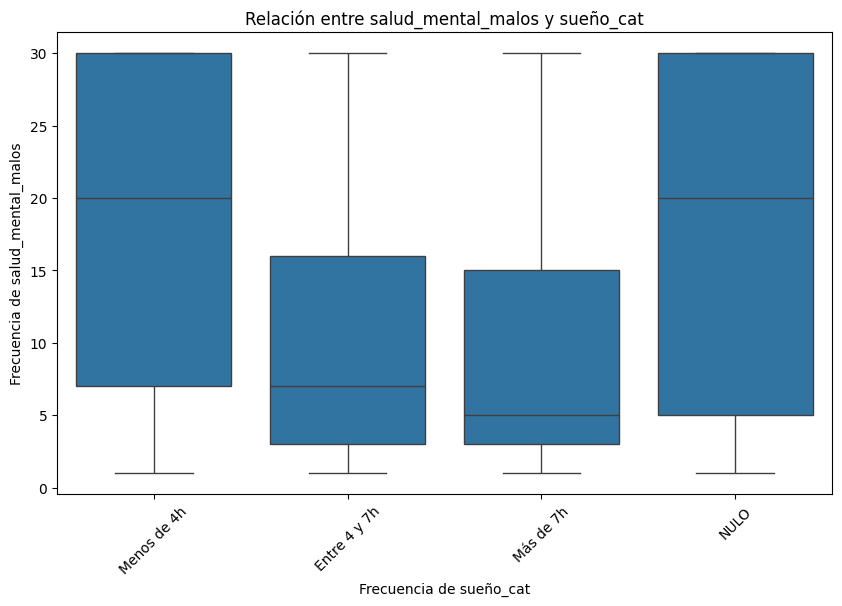

In [7]:
boxplot_cat_num(df, 'sueño_cat', 'salud_mental_malos')

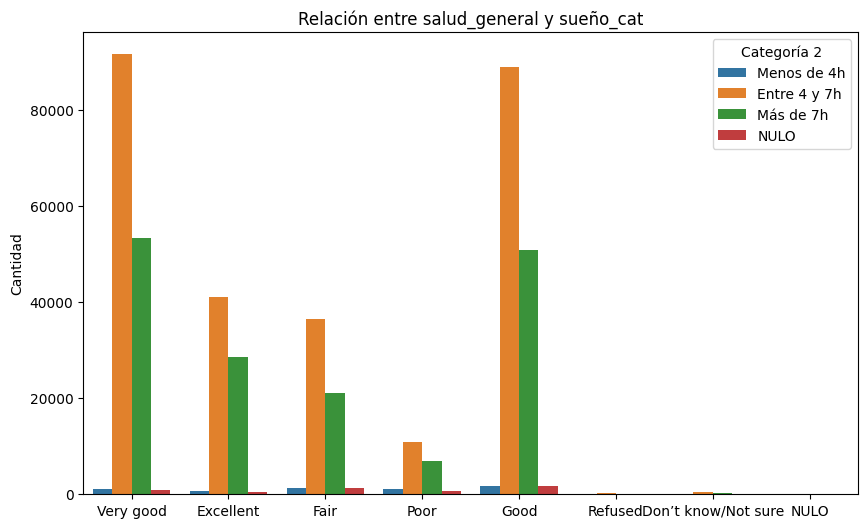

In [10]:
plot_cartegoricas(df, 'salud_general', 'sueño_cat')

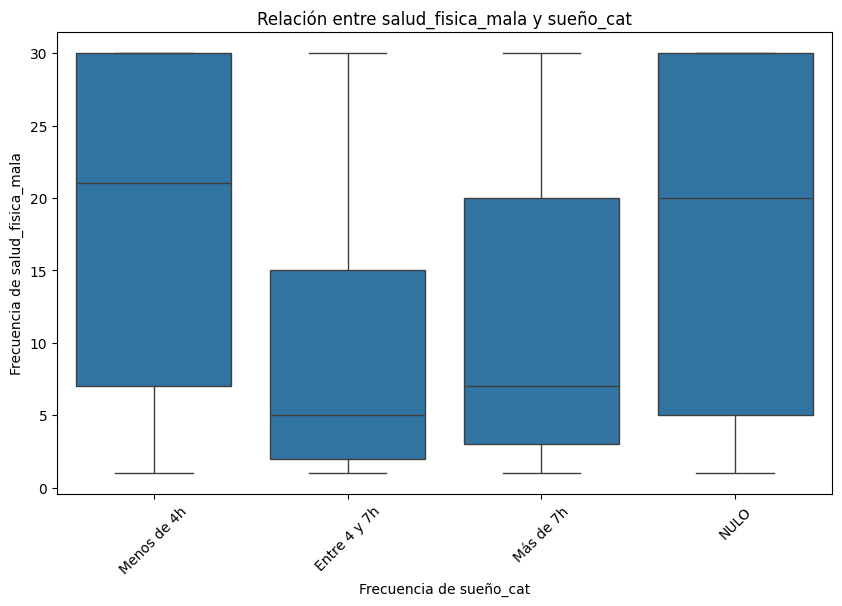

In [11]:
boxplot_cat_num(df, 'sueño_cat', 'salud_fisica_mala')

*Conclusiones*:

- El grupo de **"Menos de 4h"** de sueño al día, refleja la peor salud de todas. En la gráfica 2, aunque son pocos, tienen una presencia notable en las categorías de salud "Poor". En las gráficas de cajas (1 y 3), sus medianas de días malos son altísimas (20-21 días).

- El grupo **"Entre 4 y 7h"**  presenta indicadores de salud bastante buenos (barras naranjas dominantes en "Good" y "Very Good" y medianas bajas de días malos).

- En cuanto a la **salud mental**, la gráfica 1 muestra que el grupo **"Más de 7h"** es el ganador indiscutible. Tienen la mediana más baja de días malos y la menor dispersión. Aquí, el rango alto es el óptimo.

- En cuanto a la **salud física**:
     - La gráfica 3, el grupo **"Más de 7h"** empeora ligeramente respecto al **grupo "4-7h"**. La mediana de días malos sube. Esto puede ser por los valores mal codificados que se encuentran por encima de las 15h.
     - En la categoría **"Menos de 4h"**, a caja del diagrama no solo es alta, sino que el tercer cuartil y el bigote superior están "pegados" al techo del gráfico (30 días).  Esto indica que una porción masiva (más del 25-30%) de las personas que duermen menos de 4 horas viven con malestar físico todos los días del mes.